In [31]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
otodom = pd.read_csv('./otodom_all.csv')
data0 = pd.read_csv('./morizon_40_80.csv')
data1 = pd.read_csv('./morizon_11_40.csv')
data2 = pd.read_csv('./morizon_1_10.csv')
data3 = pd.read_csv('./morizon_last.csv')
morizon = pd.concat([data0, data1, data2, data3], ignore_index=True)
otodom.drop(columns=['zametr', 'wysposażenie', 'rodzaj zabudowy', 'forma wlasnosci', 'ogrzewanie', 'typ'], inplace=True)
otodom['rok budowy'] = 1969
otodom.head()

,nazwa ogloszenia,cena,opis,lokalizacja,pokoje,powierzchnia,piętro,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,link,rok budowy
0,Inwestycyjnie | DWUPAK | Blisko centrum,906 780 zł,"OFERTA BEZ PCC, BEZ PROWIZJI!\nDwupak inwestyc...","Przedmieście Świdnickie, Stare Miasto, Wrocław...",5.0,"88,9 m²",1/1,do wykończenia,balkon,garaż/miejsce parkingowe,https://www.otodom.pl/pl/oferta/inwestycyjnie-...,1969
1,Gotowe z Aktem Duży Balkon Winda Tramwaj 0%Kos...,649 000 zł,STARE MIASTO BEZ PROWIZJI BEZ PODATKU 2% PCC\n...,"Szczepin, Stare Miasto, Wrocław, dolnośląskie",2.0,"38,65 m²",1/6,do wykończenia,balkon,NaN,https://www.otodom.pl/pl/oferta/gotowe-z-aktem...,1969
2,"Przestronne, centrum, obok parku, CO miejskie!",824 000 zł,"Przepełnione zaletami, doinwestowane i gustown...","ul. Nowowiejska, Ołbin, Śródmieście, Wrocław, ...",2.0,"66,71 m²",4/5,do zamieszkania,"balkon, taras",NaN,https://www.otodom.pl/pl/oferta/przestronne-ce...,1969
3,"Po remoncie | 2 pokoje, winda, piwnica | balkon!",519 800 zł,"Cena mieszkania: 544 900,- zł\nPromocja do koń...","Popowice Południowe, Fabryczna, Wrocław, dolno...",2.0,35 m²,5/10,do zamieszkania,NaN,garaż/miejsce parkingowe,https://www.otodom.pl/pl/oferta/po-remoncie-2-...,1969
4,Piękne mieszkanie w centrum,639 000 zł,Oferujemy na sprzedaż mieszkanie o powierzchni...,"ul. Brzeska, Przedmieście Oławskie, Krzyki, Wr...",2.0,"39,5 m²",1/4,do zamieszkania,NaN,NaN,https://www.otodom.pl/pl/oferta/piekne-mieszka...,1969


In [33]:
morizon.rename(columns = {'nazwa_ogloszenia': 'nazwa ogloszenia', 'balkon': 'balkon/ogrod/taras'}, inplace=True)
morizon['taras'] = morizon['taras'].replace(np.nan, False).replace('Tak', True).astype(bool)
morizon['balkon/ogrod/taras'] = morizon['balkon/ogrod/taras'].replace(np.nan, False).replace('Tak', True).astype(bool)
morizon['balkon/ogrod/taras'] = morizon['balkon/ogrod/taras'] | morizon['taras']
morizon.drop(columns=['taras'], inplace=True)
morizon

,nazwa ogloszenia,link,cena,opis,lokalizacja,pokoje,stan wykonczenia,miejsce parkingowe,powierzchnia,balkon/ogrod/taras,piętro,rok budowy
0,Opis nieruchomości,https://www.morizon.pl/oferta/sprzedaz-mieszka...,NaN,Najważniejsze atuty\n✅ Projekt z pełną infrast...,"Krzyki,",3,NaN,NaN,"54,71 m²",False,1/3,2025.0
1,Inwestycja blisko Odry,https://www.morizon.pl/oferta/sprzedaz-mieszka...,609 000 zł,"Na sprzedaż mieszkanie o powierzchni 38,37 mkw...",Gnieźnieńska,1,NaN,NaN,"38,37 m²",True,NaN,2023.0
2,Opis nieruchomości,https://www.morizon.pl/oferta/sprzedaz-mieszka...,NaN,Najważniejsze atuty\n✅ Projekt z pełną infrast...,"Krzyki,",3,NaN,NaN,"50,02 m²",False,1/3,2025.0
3,Opis nieruchomości,https://www.morizon.pl/oferta/sprzedaz-mieszka...,NaN,Najważniejsze atuty\n✅ Projekt z pełną infrast...,"Krzyki,",3,NaN,NaN,"54,89 m²",False,1/3,2025.0
4,2 pokoje w centrum z dużym balkonem,https://www.morizon.pl/oferta/sprzedaz-mieszka...,635 000 zł,Opiekun oferty\nPiotr Wiatrzyk\n602... pokaż\n...,"Śródmieście,",2,NaN,NaN,"53,06 m²",True,3/5,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,3 pokoje | Garaż | Komórka | 65m2,https://www.morizon.pl/oferta/sprzedaz-mieszka...,819 000 zł,Home Brand oferuje w pełni wyposażone 3-pokojo...,"Jagodno,",3.0,NaN,NaN,65 m²,True,1/4,2011.0
4868,"2 pokoje / Las Sołtysowicki / 55,83m",https://www.morizon.pl/oferta/sprzedaz-mieszka...,541 551 zł,0 % PROWIZJI - gotowe do odbioru\nNa sprzedaż ...,"Wrocław-Psie Pole,",2.0,NaN,NaN,"55,83 m²",False,2/3,2023.0
4869,"4 POKOJE, TARAS I WYKUSZ NA OSTATNIM PIĘTRZE",https://www.morizon.pl/oferta/sprzedaz-mieszka...,1 349 000 zł,Opiekun oferty:\nBartosz Wasielewski\n602... p...,"Stare Miasto,",4.0,NaN,NaN,"96,93 m²",True,9/9,2022.0
4870,2 pokoje z ogródkiem / Krzyki/ Park Wschodni /,https://www.morizon.pl/oferta/sprzedaz-mieszka...,574 555 zł,0 % prowizji\nodbiór III kwartał 2024r.\n-Tere...,"Wrocław-Krzyki,",2.0,NaN,NaN,"47,20 m²",False,NaN,2024.0


In [34]:
data = pd.concat([otodom, morizon]).drop_duplicates()
data

,nazwa ogloszenia,cena,opis,lokalizacja,pokoje,powierzchnia,piętro,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,link,rok budowy
0,Inwestycyjnie | DWUPAK | Blisko centrum,906 780 zł,"OFERTA BEZ PCC, BEZ PROWIZJI!\nDwupak inwestyc...","Przedmieście Świdnickie, Stare Miasto, Wrocław...",5.0,"88,9 m²",1/1,do wykończenia,balkon,garaż/miejsce parkingowe,https://www.otodom.pl/pl/oferta/inwestycyjnie-...,1969.0
1,Gotowe z Aktem Duży Balkon Winda Tramwaj 0%Kos...,649 000 zł,STARE MIASTO BEZ PROWIZJI BEZ PODATKU 2% PCC\n...,"Szczepin, Stare Miasto, Wrocław, dolnośląskie",2.0,"38,65 m²",1/6,do wykończenia,balkon,NaN,https://www.otodom.pl/pl/oferta/gotowe-z-aktem...,1969.0
2,"Przestronne, centrum, obok parku, CO miejskie!",824 000 zł,"Przepełnione zaletami, doinwestowane i gustown...","ul. Nowowiejska, Ołbin, Śródmieście, Wrocław, ...",2.0,"66,71 m²",4/5,do zamieszkania,"balkon, taras",NaN,https://www.otodom.pl/pl/oferta/przestronne-ce...,1969.0
3,"Po remoncie | 2 pokoje, winda, piwnica | balkon!",519 800 zł,"Cena mieszkania: 544 900,- zł\nPromocja do koń...","Popowice Południowe, Fabryczna, Wrocław, dolno...",2.0,35 m²,5/10,do zamieszkania,NaN,garaż/miejsce parkingowe,https://www.otodom.pl/pl/oferta/po-remoncie-2-...,1969.0
4,Piękne mieszkanie w centrum,639 000 zł,Oferujemy na sprzedaż mieszkanie o powierzchni...,"ul. Brzeska, Przedmieście Oławskie, Krzyki, Wr...",2.0,"39,5 m²",1/4,do zamieszkania,NaN,NaN,https://www.otodom.pl/pl/oferta/piekne-mieszka...,1969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,3 pokoje | Garaż | Komórka | 65m2,819 000 zł,Home Brand oferuje w pełni wyposażone 3-pokojo...,"Jagodno,",3.0,65 m²,1/4,NaN,True,NaN,https://www.morizon.pl/oferta/sprzedaz-mieszka...,2011.0
4868,"2 pokoje / Las Sołtysowicki / 55,83m",541 551 zł,0 % PROWIZJI - gotowe do odbioru\nNa sprzedaż ...,"Wrocław-Psie Pole,",2.0,"55,83 m²",2/3,NaN,False,NaN,https://www.morizon.pl/oferta/sprzedaz-mieszka...,2023.0
4869,"4 POKOJE, TARAS I WYKUSZ NA OSTATNIM PIĘTRZE",1 349 000 zł,Opiekun oferty:\nBartosz Wasielewski\n602... p...,"Stare Miasto,",4.0,"96,93 m²",9/9,NaN,True,NaN,https://www.morizon.pl/oferta/sprzedaz-mieszka...,2022.0
4870,2 pokoje z ogródkiem / Krzyki/ Park Wschodni /,574 555 zł,0 % prowizji\nodbiór III kwartał 2024r.\n-Tere...,"Wrocław-Krzyki,",2.0,"47,20 m²",NaN,NaN,False,NaN,https://www.morizon.pl/oferta/sprzedaz-mieszka...,2024.0


<AxesSubplot: >

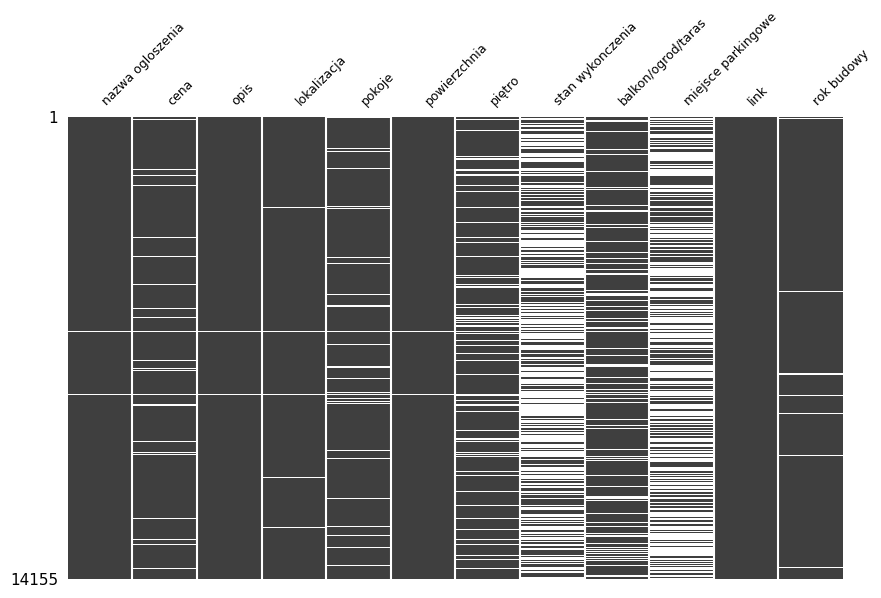

In [35]:
msno.matrix(data.sample(frac=1, random_state=42), figsize=(10, 6), fontsize=9, sparkline=False)

In [36]:
data[(~data.pokoje.isna()) & (data['pokoje'].str.contains(','))]

,nazwa ogloszenia,cena,opis,lokalizacja,pokoje,powierzchnia,piętro,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe,link,rok budowy
654,MINIMAXY-wyposażony mikroapartament- przy LOTN...,349 000 zł,• Lokalizacja: Strachocin/ Władysława Zarembow...,Strachowice,"24,84","24,84 m²",2/4,NaN,True,NaN,https://www.morizon.pl/oferta/sprzedaz-mieszka...,2022.0


In [37]:
data['stan wykonczenia'] = data['stan wykonczenia'].fillna('do remontu')
columns_sonar = ['nazwa ogloszenia', 'cena', 'opis', 'lokalizacja', 'pokoje', 'powierzchnia', 'piętro', 'stan wykonczenia', 'balkon/ogrod/taras', 'miejsce parkingowe']
data_raw = data.copy()
data_raw = data_raw[~(data_raw.cena.astype(str).str.contains('EUR'))]
data_raw = data_raw[columns_sonar]
colnames = ['cena', 'powierzchnia']
replace_dict = {'zł': '', 'm2': '', '/': '', ' ': ''}

data_raw['cena'] = np.where(data_raw['cena'] == 'Zapytaj o cenę', 0, data_raw['cena'])
data_raw[colnames] = data_raw[colnames].astype('str')
data_raw[colnames] = data_raw[colnames].applymap(lambda x: str(x).replace('zł', '').replace('m²', '').replace('/', '').replace(' ', '').replace(',', '.'))

#data_raw[['powierzchnia', 'zametr']]
#data['cena'] = np.where(data['cena'].str.contains('EUR'),
#                        data['zametr'] * data['powierzchnia'],
#                        data['cena'])


data_raw.loc[data_raw['pokoje'].astype(str).str.contains(','), 'pokoje'] = np.nan
data_raw.loc[data_raw['pokoje'] == 33, 'pokoje'] = 3
data_raw = data_raw[(data_raw.cena.astype(float) < 1e7) & (data_raw.powierzchnia.astype(float) < 1000)]

data_raw[colnames] = data_raw[colnames].astype('float')
data_raw['piętro'] = data_raw['piętro'].str.replace('parter', '0')
data_raw['liczba pięter'] = data_raw['piętro'].str.extract(r'(\d+)/(\d+)')[1].astype(float)
data_raw['piętro'] = data_raw['piętro'].str.extract(r'(\d+)').astype(float)
data_raw['pokoje'] = data_raw['pokoje'].fillna(1).astype(int)

dzielnice = '|'.join(['Fabryczna', 'Krzyki', 'Stare Miasto', 'Śródmieście', 'Psie Pole'])
data_raw['dzielnica'] = data_raw['lokalizacja'].str.extract(f'({dzielnice})')
data_raw.insert(4, 'dzielnica', data_raw.pop('dzielnica'))
data_raw['piętro'] = data_raw['piętro'].fillna(4)
data_raw['liczba pięter'] = data_raw[['liczba pięter', 'piętro']].max(axis=1).fillna(4)

column_moved = data_raw.columns[-1]
data_raw.insert(8, column_moved, data_raw.pop(column_moved))
data_raw[['piętro', 'liczba pięter']] = data_raw[['piętro', 'liczba pięter']].astype(int)

data_raw.head()

,nazwa ogloszenia,cena,opis,lokalizacja,dzielnica,pokoje,powierzchnia,piętro,liczba pięter,stan wykonczenia,balkon/ogrod/taras,miejsce parkingowe
0,Inwestycyjnie | DWUPAK | Blisko centrum,906780.0,"OFERTA BEZ PCC, BEZ PROWIZJI!\nDwupak inwestyc...","Przedmieście Świdnickie, Stare Miasto, Wrocław...",Stare Miasto,5,88.90,1,1,do wykończenia,balkon,garaż/miejsce parkingowe
1,Gotowe z Aktem Duży Balkon Winda Tramwaj 0%Kos...,649000.0,STARE MIASTO BEZ PROWIZJI BEZ PODATKU 2% PCC\n...,"Szczepin, Stare Miasto, Wrocław, dolnośląskie",Stare Miasto,2,38.65,1,6,do wykończenia,balkon,NaN
2,"Przestronne, centrum, obok parku, CO miejskie!",824000.0,"Przepełnione zaletami, doinwestowane i gustown...","ul. Nowowiejska, Ołbin, Śródmieście, Wrocław, ...",Śródmieście,2,66.71,4,5,do zamieszkania,"balkon, taras",NaN
3,"Po remoncie | 2 pokoje, winda, piwnica | balkon!",519800.0,"Cena mieszkania: 544 900,- zł\nPromocja do koń...","Popowice Południowe, Fabryczna, Wrocław, dolno...",Fabryczna,2,35.00,5,10,do zamieszkania,NaN,garaż/miejsce parkingowe
4,Piękne mieszkanie w centrum,639000.0,Oferujemy na sprzedaż mieszkanie o powierzchni...,"ul. Brzeska, Przedmieście Oławskie, Krzyki, Wr...",Krzyki,2,39.50,1,4,do zamieszkania,NaN,NaN


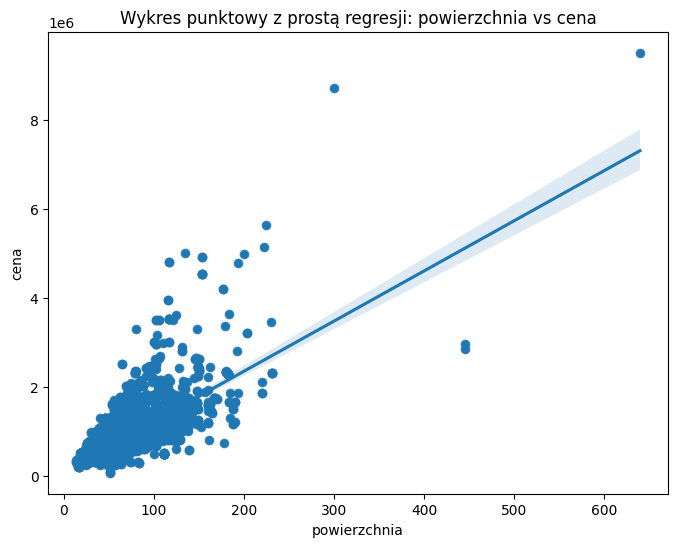

In [38]:
col = 'powierzchnia'
fig, ax1 = plt.subplots(figsize = (8, 6))
 
sns.scatterplot(x = data_raw[data_raw.cena != 0][col], y = data_raw[data_raw.cena != 0]['cena'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = data_raw[data_raw.cena != 0][col], y = data_raw[data_raw.cena != 0]['cena'], ax = ax1)
ax1.set_title(f'Wykres punktowy z prostą regresji: {col} vs cena', fontsize=12)

plt.show()

In [39]:
otodom0 = pd.read_csv('./otodom_290124.csv')
morizon0 = pd.read_csv('./morizon_280124.csv')
otodom0.drop(columns=['zametr', 'wysposażenie', 'forma wlasnosci', 'ogrzewanie', 'typ', 'czynsz'], inplace=True)
otodom0['rok budowy'] = 1969
morizon0.rename(columns = {'nazwa_ogloszenia': 'nazwa ogloszenia', 'balkon': 'balkon/ogrod/taras'}, inplace=True)
morizon0['taras'] = morizon0['taras'].replace(np.nan, False).replace('Tak', True).astype(bool)
morizon0['balkon/ogrod/taras'] = morizon0['balkon/ogrod/taras'].replace(np.nan, False).replace('Tak', True).astype(bool)
morizon0['balkon/ogrod/taras'] = morizon0['balkon/ogrod/taras'] | morizon0['taras']
morizon0.drop(columns=['taras'], inplace=True)
data = pd.concat([otodom0, morizon0], ignore_index=True).drop_duplicates()


In [23]:
data.to_csv('combined_24.csv')